In [5]:
import numpy as np

In [6]:
n_dots = 200
X = np.linspace(-2*np.pi,2*np.pi,n_dots)
Y = np.sin(X)+0.2*np.random.rand(n_dots)-0.1 #最后两项用于添加噪声
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)  #以上内容准备了基于正弦函数制作了一个数据集

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    scaler = StandardScaler()
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), #制作了一个流水线，先PolynomialFeatures生成多项式特征矩阵，再用线性回归计算
                         ("linear_regression", linear_regression)])
    return pipeline

In [8]:
from sklearn.metrics import mean_squared_error
degrees = [2, 3, 5, 10]
results = []
for d in degrees:
    model = polynomial_model(degree=d)
    model.fit(X, Y)
    train_score = model.score(X, Y)
    mse = mean_squared_error(Y, model.predict(X))
    results.append({"model": model, "degree": d, "score": train_score, "mse": mse})
for r in results:
    print("degree: {}; train score: {}; mean squared error: {}"
          .format(r["degree"], r["score"], r["mse"]))


degree: 2; train score: 0.15131250036836674; mean squared error: 0.4309696613382831
degree: 3; train score: 0.2753659207829029; mean squared error: 0.367974435643179
degree: 5; train score: 0.8898237005189557; mean squared error: 0.0559483231406854
degree: 10; train score: 0.9943318397155639; mean squared error: 0.002878332860157348


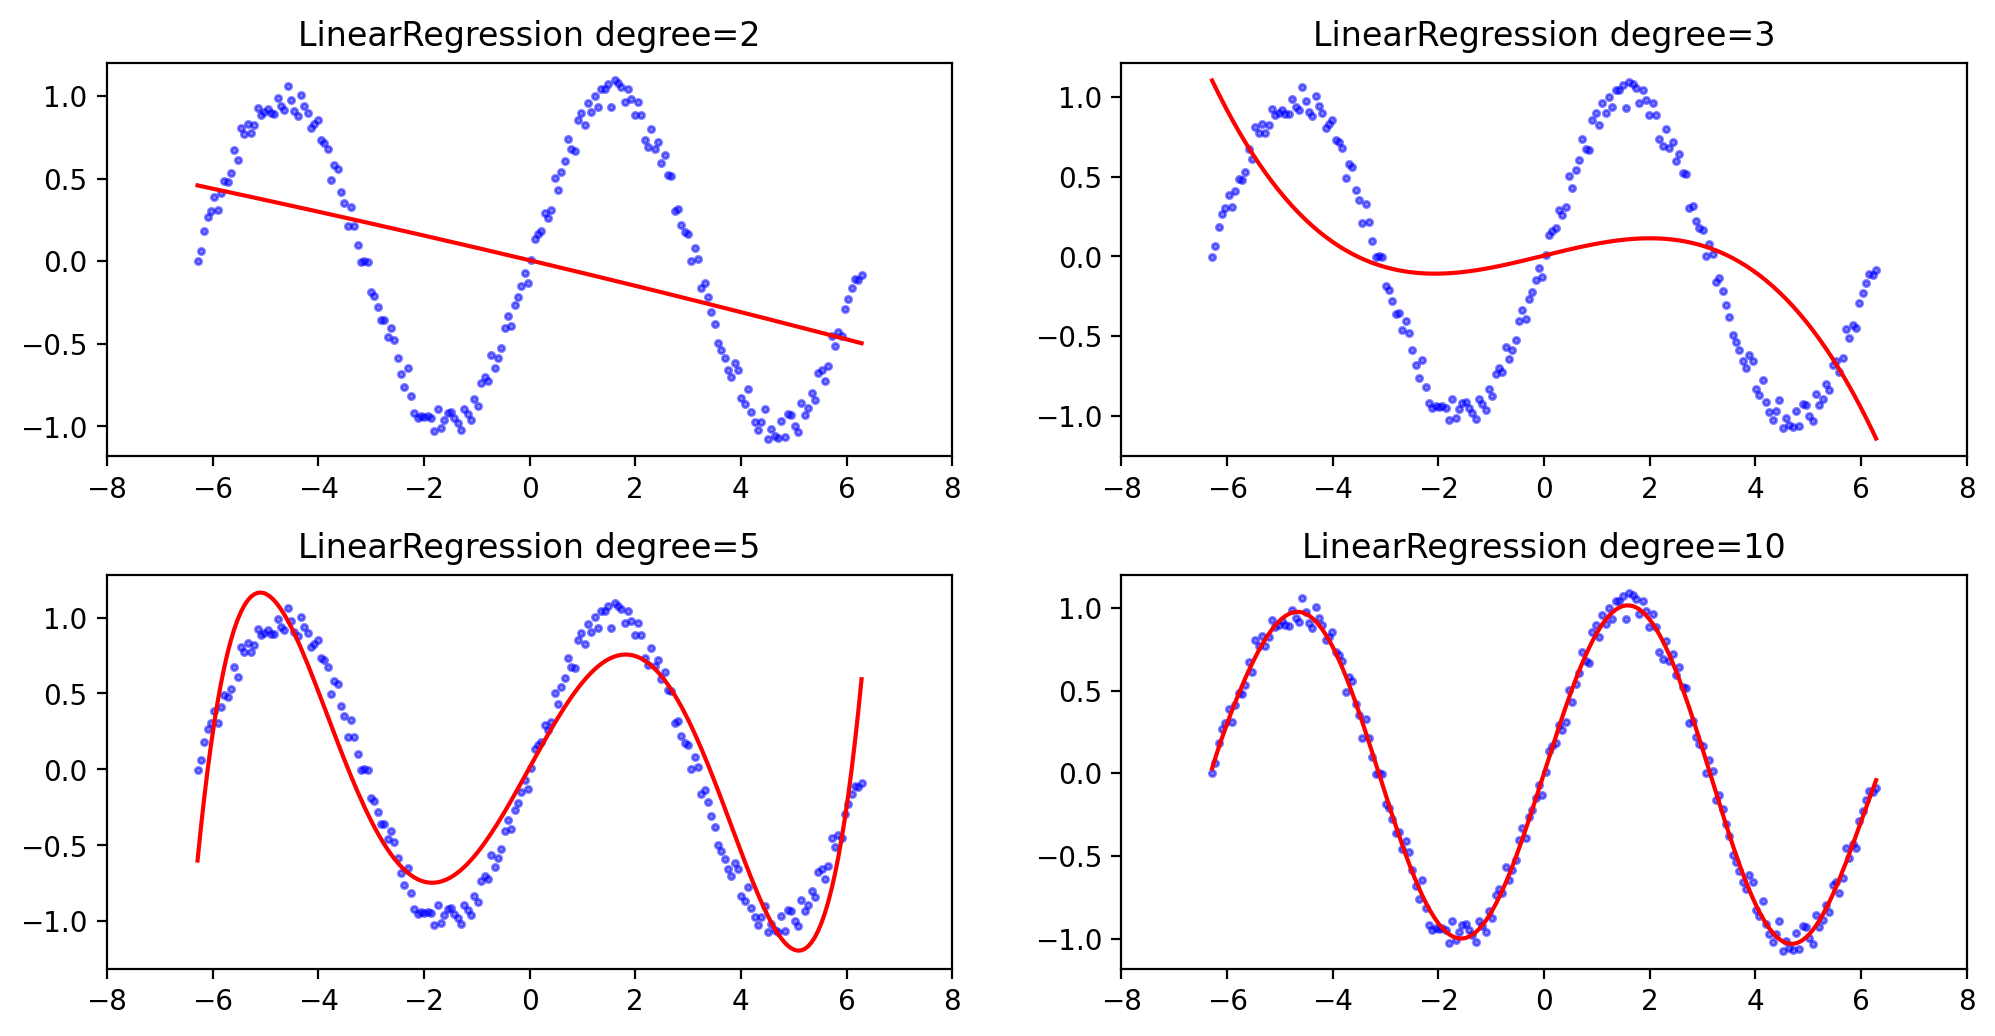

In [9]:
import matplotlib.pyplot as plt
from matplotlib.figure import SubplotParams
plt.figure(figsize=(12,6),dpi=200,subplotpars=SubplotParams(hspace=0.3))
for i,r in enumerate(results):
    fig = plt.subplot(2,2,i+1)
    plt.xlim(-8,8)
    plt.title("LinearRegression degree={}".format(r["degree"]))
    plt.scatter(X,Y,s=5,c='b',alpha=0.5)
    plt.plot(X,r["model"].predict(X),'r-')
plt.show()